# Unit 5 - Financial Planning

In [51]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [52]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [53]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [54]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [55]:
# Fetching current BTC and ETH price
btc_request = requests.get(btc_url)
eth_request = requests.get(eth_url)
btc_json = btc_request.json()
eth_json = eth_request.json()



# Compute current value of my crpto
my_btc_value = my_btc * btc_json['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth * eth_json['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43503.60
The current value of your 5.3 ETH is $12740.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [56]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [57]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [58]:
# Format current date as ISO format
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-24', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Preview DataFrame
portfolio_df.head()

AGG                                        \
                             open     high       low    close    volume   
time                                                                      
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877   
2019-01-08 00:00:00-05:00  106.40  106.530  105.5300  106.420   3818241   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  256.82  257.31  254.00  256.65   88864452

In [59]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df['AGG']['close'].iloc[-1]
spy_close_price = portfolio_df['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.12
Current SPY closing price: $439.88


In [60]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21994.00
The current value of your 200 AGG shares is $22424.00


### Savings Health Analysis

In [61]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
savings_data = {'Amount': [crypto, shares]}

df_savings = pd.DataFrame(savings_data, index=['Crypto', 'Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,56243.899
Shares,44418.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

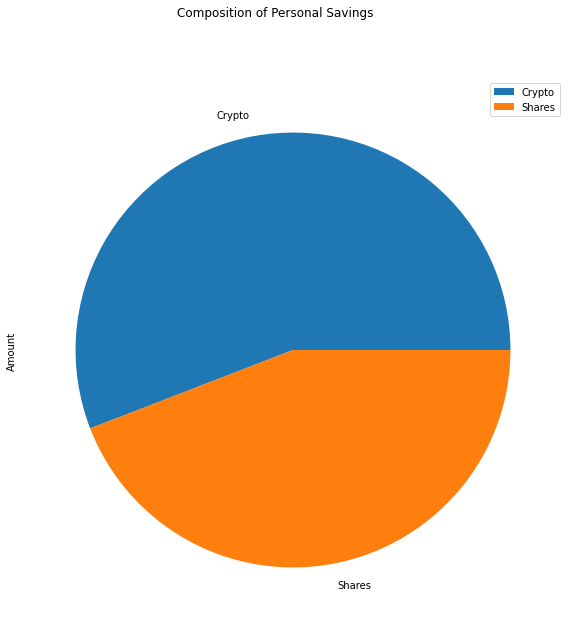

In [62]:
# Plot savings pie chart
df_savings.plot(kind='pie', figsize=(20, 10), subplots = True, title = 'Composition of Personal Savings')

In [63]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congrats, your total savings of ${total_savings} exceeds your emergency fund of ${emergency_fund}.')
elif total_savings == emergency_fund:
    print(f'Congrats, you have reached your emergency fund goal of ${emergency_fund}.')
else:
    print(f'Keep going, you are ${emergency_fund - total_savings} away from reaching your goal.')

Congrats, your total savings of $100661.899 exceeds your emergency fund of $36000.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [64]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-26', tz='America/New_York').isoformat()

In [65]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

#tickers and timeframe
tickers = ['AGG', 'SPY']
timeframe = '1D'

#closing prices dataframe 
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date, 
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-02-06 00:00:00-05:00  107.46  107.5600  107.2800  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.0000  107.085  3440626.0   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.7700  106.920  4351275.0   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.7000  106.760  5603974.0   
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.770  5075086.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-02-06 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-02-07 00:00:00-05:00  268.50  272.36  267.63  267.66  112819262.0  
2018-02-08 00:00:00-05:00  267.97  268.17  257.59  257.72  156654099.0  
2018-02-09 00:00:00-05:00  260.80  263.61  252.92  261.67  207357854.0  
2018-02-12 00:00:00-05:00  263.87  267.01  261.88  265.26   99933794.0

In [66]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [67]:
# Printing the simulation input data
thirty_year_MC.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-02-06 00:00:00-05:00  107.46  107.5600  107.2800  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.0000  107.085  3440626.0   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.7700  106.920  4351275.0   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.7000  106.760  5603974.0   
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.770  5075086.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-06 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   
2018-02-08 00:00:00-05:00    -0.001541  267.97  268.17  257.59  257.72   
2018-02-09 00:00:00-05:00    -0.001496  260.80  263.61  252.92  261.67   
2018-02-12 00:00:00-05:00     0.000094  263.87  267.01  261.88  265.26   

                                                     
                                volume daily_return  
time                                                 
2018-02-06 00:00:00-05:00          NaN          NaN  
2018-02-07 00:00:00-05:00  112819262.0          NaN  
2018-02-08 00:00:00-05:00  156654099.0    -0.037137  
2018-02-09 00:00:00-05:00  207357854.0     0.015327  
2018-02-12 00:00:00-05:00   99933794.0     0.013720

In [68]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/timothywardlow/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997964,0.997255,1.000244,0.996899,0.993520,0.998475,1.009205,1.002876,0.988311,1.013645,...,1.005901,1.001785,0.997420,1.014391,0.999813,1.002057,0.996502,1.011003,1.002099,1.000718
2,0.987085,1.010437,0.999233,0.988259,1.000577,0.993284,1.008971,1.016632,1.013348,1.006781,...,1.008969,1.007404,1.009281,1.002556,0.985074,1.003447,0.989720,1.004996,0.999658,1.006717
3,0.986176,1.003289,0.996162,0.990546,0.995566,1.000973,1.005285,1.011502,1.018873,0.992308,...,0.999155,1.010352,1.004699,1.006916,0.995857,1.016748,0.987908,1.015385,1.000173,1.012785
4,0.973664,1.009566,0.988130,0.996234,0.998950,1.001518,1.005219,1.007065,1.014251,0.986384,...,0.997671,1.013194,1.007331,1.009416,0.999716,1.007962,0.990005,1.019673,1.005744,1.007958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.961871,19.190248,10.445311,7.202127,3.272094,27.662950,31.417074,14.606434,7.465224,13.236523,...,1.562304,14.997392,5.649114,18.334805,13.664225,5.369339,6.408329,9.767658,22.156105,4.126410
7557,5.953074,18.937968,10.432834,7.165869,3.250097,27.356184,31.318840,14.683063,7.498030,13.420847,...,1.556072,14.899443,5.679046,18.454784,13.671334,5.362902,6.387951,9.766481,22.314731,4.144680
7558,6.020251,18.854512,10.323960,7.164199,3.248645,27.345491,31.096749,14.648499,7.538664,13.371657,...,1.557699,14.811211,5.694208,18.597630,13.740113,5.338366,6.461364,9.771426,22.102777,4.189957
7559,6.104073,18.997464,10.194494,7.162806,3.241471,27.657844,31.426460,14.690137,7.616628,13.457054,...,1.558748,14.852158,5.719340,18.682301,13.566960,5.345068,6.472031,9.802730,22.075946,4.142685


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

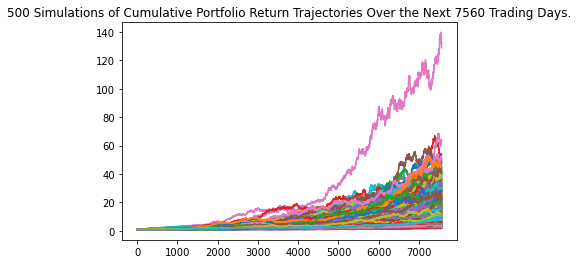

In [32]:
# Plot simulation outcomes
thirty_year_MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

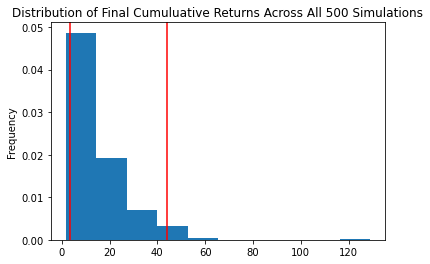

In [33]:
# Plot probability distribution and confidence intervals
thirty_year_MC.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = thirty_year_MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             15.106800
std              11.799713
min               1.666942
25%               7.578854
50%              12.035265
75%              17.959009
max             129.015990
95% CI Lower      3.393355
95% CI Upper     43.928609
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $67867.1 and $878572.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $101800.65 and $1317858.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500, 
    num_trading_days = 252 * 5
)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/timothywardlow/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001010,1.005014,0.999693,0.990647,0.993763,1.001142,1.008818,1.009430,1.004526,1.000062,...,0.989315,0.997964,1.001310,0.994494,0.995926,1.005010,1.007844,1.002064,0.993260,0.992454
2,1.007221,1.003355,0.998668,0.998335,0.994447,1.003857,1.008267,1.006036,1.002240,1.004504,...,0.992604,0.999374,0.996148,1.003290,0.991686,0.998472,1.010842,0.996754,0.993943,1.005546
3,1.015161,1.001180,0.999665,1.007581,0.990428,0.985358,0.998278,1.017282,0.998520,1.012748,...,0.984473,1.008819,1.000577,1.019883,0.986944,0.992588,1.022768,1.007394,0.992809,1.002130
4,1.006566,1.009279,1.003509,1.002000,0.996505,0.980907,0.992162,1.015921,0.985839,1.011123,...,0.970446,1.014207,0.997720,1.016335,0.984908,0.985678,1.033718,1.004840,0.989587,0.998949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.528858,2.002353,1.143106,1.439124,2.486313,1.071674,0.857817,1.624574,1.551882,1.529359,...,1.247851,1.351481,0.979750,2.631368,1.566879,2.022304,2.050145,1.308296,2.649154,1.360649
1257,2.520825,1.991637,1.146477,1.423075,2.482180,1.059857,0.851500,1.631666,1.559314,1.535976,...,1.250130,1.368816,0.974594,2.627272,1.558083,2.006482,2.036342,1.300169,2.618707,1.357552
1258,2.540614,1.983319,1.151073,1.427094,2.486155,1.053478,0.855284,1.630061,1.563199,1.553762,...,1.244288,1.374702,0.977334,2.613739,1.550520,2.001968,1.999603,1.317222,2.637103,1.360986
1259,2.521672,2.017809,1.172419,1.419261,2.478376,1.054791,0.849212,1.635390,1.566535,1.565961,...,1.259223,1.372235,0.983728,2.602079,1.546187,2.015311,1.978845,1.326159,2.642368,1.359684


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

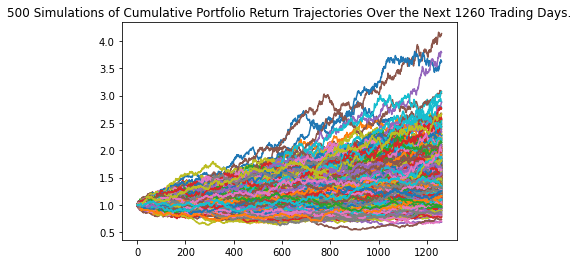

In [41]:
# Plot simulation outcomes
five_year_MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

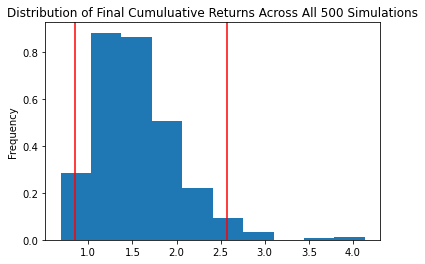

In [42]:
# Plot probability distribution and confidence intervals
five_year_MC.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = five_year_MC.summarize_cumulative_return()


# Print summary statistics
print(tbl_2)

count           500.000000
mean              1.550108
std               0.469982
min               0.684986
25%               1.209057
50%               1.499948
75%               1.796926
max               4.135085
95% CI Lower      0.846351
95% CI Upper      2.567088
Name: 1260, dtype: float64


In [45]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_2[8] * initial_investment, 2)
ci_upper_five = round(tbl_2[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within the range of $42317.57 and $128354.38


### Ten Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [47]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/timothywardlow/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004375,0.987653,1.005033,0.999622,1.013580,0.998749,0.996274,1.003750,0.996752,1.003464,...,0.997973,0.999059,1.007631,1.006704,1.011333,0.981773,1.005503,0.993608,0.999961,0.999146
2,0.991123,0.982036,1.003594,1.005713,1.007615,1.001706,1.010037,0.992555,0.999712,1.016849,...,1.005702,1.011142,1.004466,0.994306,1.015683,0.977645,0.999195,0.992608,0.998494,0.987888
3,0.988249,0.984803,1.008604,1.000085,1.016419,0.988102,1.010036,0.982198,0.992984,1.035556,...,1.010292,1.020687,1.011288,1.000546,1.021423,0.971351,0.989318,0.994140,1.005722,0.995391
4,0.997896,0.993221,0.999806,1.014717,1.028749,0.982144,0.999313,0.963381,1.000202,1.040970,...,1.022181,1.027225,1.004346,1.001295,1.033296,0.977816,0.981649,0.983209,1.015269,0.979483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.860482,4.177508,2.362139,2.328748,1.580561,4.004062,3.396368,4.157626,2.131173,1.310134,...,3.300824,1.220652,1.771402,1.442971,1.873824,3.162144,7.066512,2.082676,4.790304,2.231719
2517,3.800091,4.143150,2.352617,2.333092,1.585434,4.010021,3.395712,4.176089,2.155092,1.308618,...,3.274860,1.215024,1.778658,1.435952,1.867459,3.200186,7.079513,2.076942,4.798385,2.205507
2518,3.776026,4.135026,2.304616,2.305777,1.581814,3.980937,3.493510,4.146124,2.117419,1.308658,...,3.258898,1.217062,1.781629,1.429570,1.854994,3.209860,7.096590,2.082050,4.832362,2.206695
2519,3.765085,4.169284,2.298898,2.305088,1.588802,3.990529,3.507135,4.183801,2.091228,1.297138,...,3.209600,1.230760,1.765743,1.420467,1.852352,3.175229,7.151550,2.085604,4.813304,2.204378


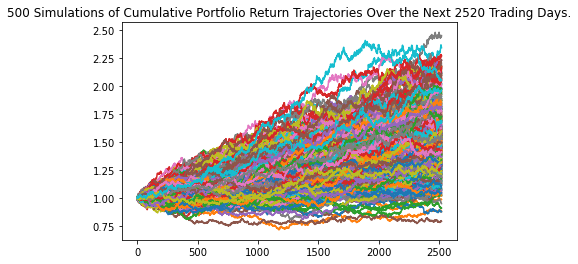

In [32]:
# Plot simulation outcomes
ten_year_MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

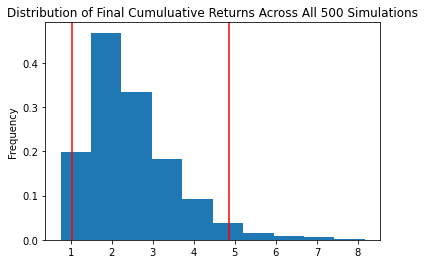

In [48]:
# Plot probability distribution and confidence intervals
ten_year_MC.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3 = ten_year_MC.summarize_cumulative_return()

# Print summary statistics
print(tbl_3)

count           500.000000
mean              2.472708
std               1.058599
min               0.748518
25%               1.712636
50%               2.245046
75%               3.004712
max               8.170132
95% CI Lower      1.036544
95% CI Upper      4.859505
Name: 2520, dtype: float64


In [50]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_3[8] * initial_investment, 2)
ci_upper_ten = round(tbl_3[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $51827.18 and $242975.26
